# Lab 2

In [54]:
import numpy as np
import pandas as pd
from IPython.display import display, Math
import matplotlib.pyplot as plt
import sys

In [55]:
def dm(eq):
    display(Math(eq))

## Исходные функции

In [56]:
def g1(x):
    return x*np.exp(x)

def g2(x):
    return x**2 * np.sin(3*x)

def g3(x):
    return np.sin(np.pi / x)

## Численное дифференцирование (базовая часть)

In [57]:
x0_g1 = 1/2
x0_g3 = 0.01
eps = sys.float_info.epsilon

low_border = -16
high_border = 0
h_values = np.logspace(-16, 0, 70, endpoint=True)

## Численная погрешность

In [58]:
def error_machine_2(h):
    return eps / h

def error_machine_4(h):
    return (3 * eps)/(2 * h)

## Аналитические выражения для производных

In [59]:
# Аналитические производные
def g1_prime(x):
    return (x+1)*np.exp(x)

def g1_third_prime(x):
    return (x+3)*np.exp(x)

def g1_fifth_prime(x):
    return (x+5)*np.exp(x)

def g2_fourth_prime(x):
    return 27 * (3 * x**2 * np.sin(3 * x) - 8 * x * np.cos(3 * x) - 4 * np.sin(3 * x))

def g3_prime(x):
    return -np.pi * np.cos(np.pi/x) / (x**2)

def g3_third_prime(x):
    return (np.pi * ((np.pi**2 - 6 * x**2) * np.cos(np.pi/x) + 6* np.pi * x * np.sin(np.pi/x)))/x**6

def g3_fifth_prime(x):
    return -(np.pi * (20 * np.pi * x *(np.pi**2 - 12 * x**2) * np.sin(np.pi/x) + (120 * x**4 - 120 * np.pi**2 * x**2 + np.pi**4) * np.cos(np.pi/x)))/x**10

## Погрешности методов численного дифференцирования

In [60]:
def error_method_term_O_2(x_0, h, third_prime):
    interval_a_b = np.arange(x_0 - h, x_0 + h, 0.1)
    M = [np.abs(third_prime(x)) for x in interval_a_b]
    return (h**2) * max(M) / 6

def error_method_term_O_4(x_0, h, fifth_prime):
    interval_a_b = np.arange(x_0 - h, x_0 + h, 0.1)
    M = [np.abs(fifth_prime(x)) for x in interval_a_b]
    return (h**4) * max(M) / 30

## Формулы численного дифференцирования

In [61]:
# Первая проивзодная 2-го порядка точности
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)

# Первая проивзодная 4-го порядка точности
def diff4(x_0, h, f):
    return (f(x_0 - 2*h) - 8*f(x_0 - h) + 8*f(x_0 + h) - f(x_0 + 2*h))/(12*h)

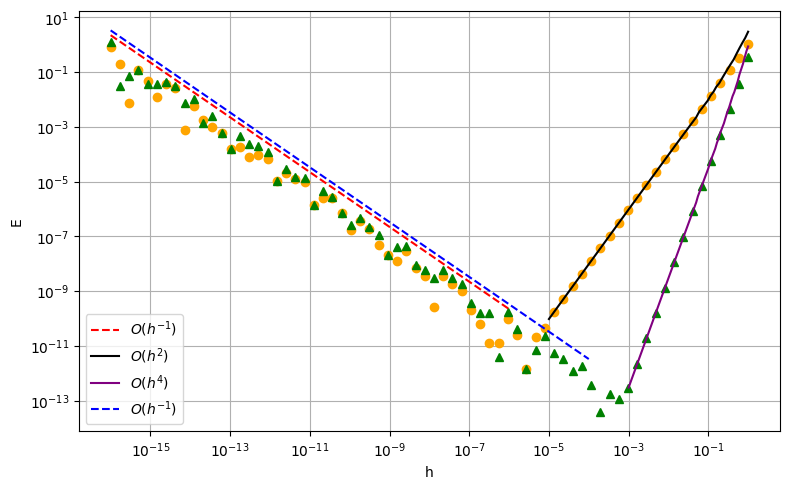

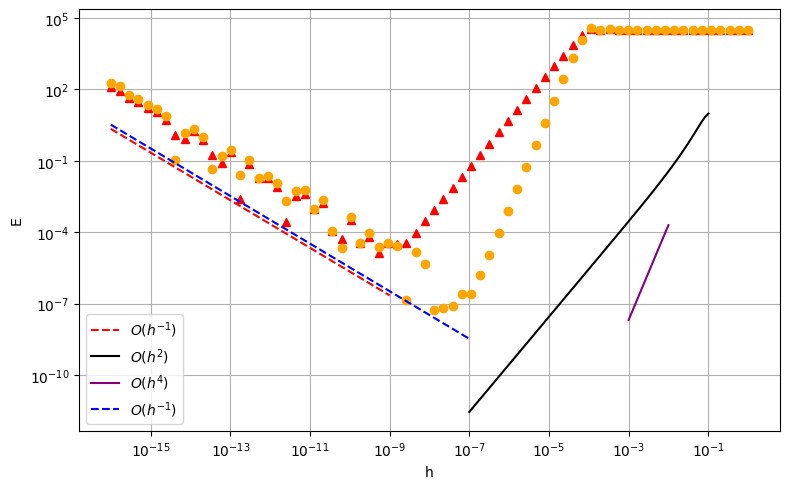

In [62]:
g1_exact = g1_prime(x0_g1)
g3_exact = g3_prime(x0_g3)

g1_diff2 = [diff2(x0_g1, h, g1) for h in h_values]
g1_diff4 = [diff4(x0_g1, h, g1) for h in h_values]
g3_diff2 = [diff2(x0_g3, h, g3) for h in h_values]
g3_diff4 = [diff4(x0_g3, h, g3) for h in h_values]


g1_errors_2 = np.abs(np.array(g1_diff2) - g1_exact)
g1_errors_4 = np.abs(np.array(g1_diff4) - g1_exact)
g3_errors_2 = np.abs(np.array(g3_diff2) - g3_exact)
g3_errors_4 = np.abs(np.array(g3_diff4) - g3_exact)


fig = plt.figure(figsize=(8, 5))

h_M_2 = np.logspace(low_border, -6, 70)
h_M_4 = np.logspace(low_border, -4, 70)
h_O_2 = np.logspace(-5, high_border, 70)
h_O_4 = np.logspace(-3, high_border, 70)

O_2 = [error_method_term_O_2(x0_g1, h_value, g1_third_prime) for h_value in h_O_2]
O_4 = [error_method_term_O_4(x0_g1, h_value, g1_fifth_prime) for h_value in h_O_4]
M_2 = [error_machine_2(h) for h in h_M_2]
M_4 = [error_machine_4(h) for h in h_M_4]

plt.loglog(h_values, g1_errors_2, 'o', color='orange')
plt.loglog(h_values, g1_errors_4, '^', color='green')

plt.loglog(h_M_2, M_2, '--', color='red', label='$O(h^{-1})$')
plt.loglog(h_O_2, O_2, color='black', label='$O(h^2)$')

plt.loglog(h_O_4, O_4, color='purple', label='$O(h^4)$')
plt.loglog(h_M_4, M_4, '--', color='blue', label='$O(h^{-1})$')

plt.legend()
plt.xlabel('h')
plt.ylabel('E')
plt.grid(True)
fig.tight_layout()
plt.savefig('g1_error.png')
plt.show()

h_M_2 = np.logspace(low_border, -9, 70)
h_M_4 = np.logspace(low_border, -7, 70)
h_O_2 = np.logspace(-7, high_border-1, 70)
h_O_4 = np.logspace(-3, high_border-2, 70)

O_2 = [error_method_term_O_2(x0_g1, h_value, g3_third_prime) for h_value in h_O_2]
O_4 = [error_method_term_O_4(x0_g1, h_value, g3_fifth_prime) for h_value in h_O_4]
M_2 = [error_machine_2(h) for h in h_M_2]
M_4 = [error_machine_4(h) for h in h_M_4]

fig = plt.figure(figsize=(8, 5))

plt.loglog(h_values, g3_errors_2, '^', color='red')
plt.loglog(h_values, g3_errors_4, 'o', color='orange')

plt.loglog(h_M_2, M_2, '--', color='red', label='$O(h^{-1})$')
plt.loglog(h_O_2, O_2, color='black', label='$O(h^2)$')

plt.loglog(h_O_4, O_4, color='purple', label='$O(h^4)$')
plt.loglog(h_M_4, M_4, '--', color='blue', label='$O(h^{-1})$')

plt.legend()
plt.xlabel('h')
plt.ylabel('E')
plt.grid(True)
fig.tight_layout()
plt.savefig('g3_error.png', dpi=400)
plt.show()

## Численное интегрирование

In [63]:
a = 0
b = np.pi
low_border = 2**2
high_border = 2**13

In [64]:
def composite_simpson(a, b, n, f) :
    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]

    sum_odd = sum(f(x[i]) for i in range(1, n, 2))
    sum_even = sum(f(x[i]) for i in range(2, n-1, 2))
    
    integral = (h / 3) * (f(a) + 4 * sum_odd + 2 * sum_even + f(b))
    return integral

def integral_g1(x):
    return (2 * x * np.sin(3 * x)) / 9 - ((9 * x**2 - 2) * np.cos(3 * x)) / 27

def definite_integral_f(a, b, integral_func):
    return integral_func(b) - integral_func(a)

In [65]:
def error_method_O_4(a, b, n, diff_f):
    h = (b - a) / n
    interval_a_b = np.arange(a, b)
    M = [np.abs(diff_f(x_i)) for x_i in interval_a_b]
    return (b - a) * (h**4) * max(M) / 180

def absolute_error_E(a, b, n, f, definite_integral_f, num_integral_f):
    return np.abs(definite_integral_f(a, b, integral_g1) - num_integral_f(a, b, n, f))

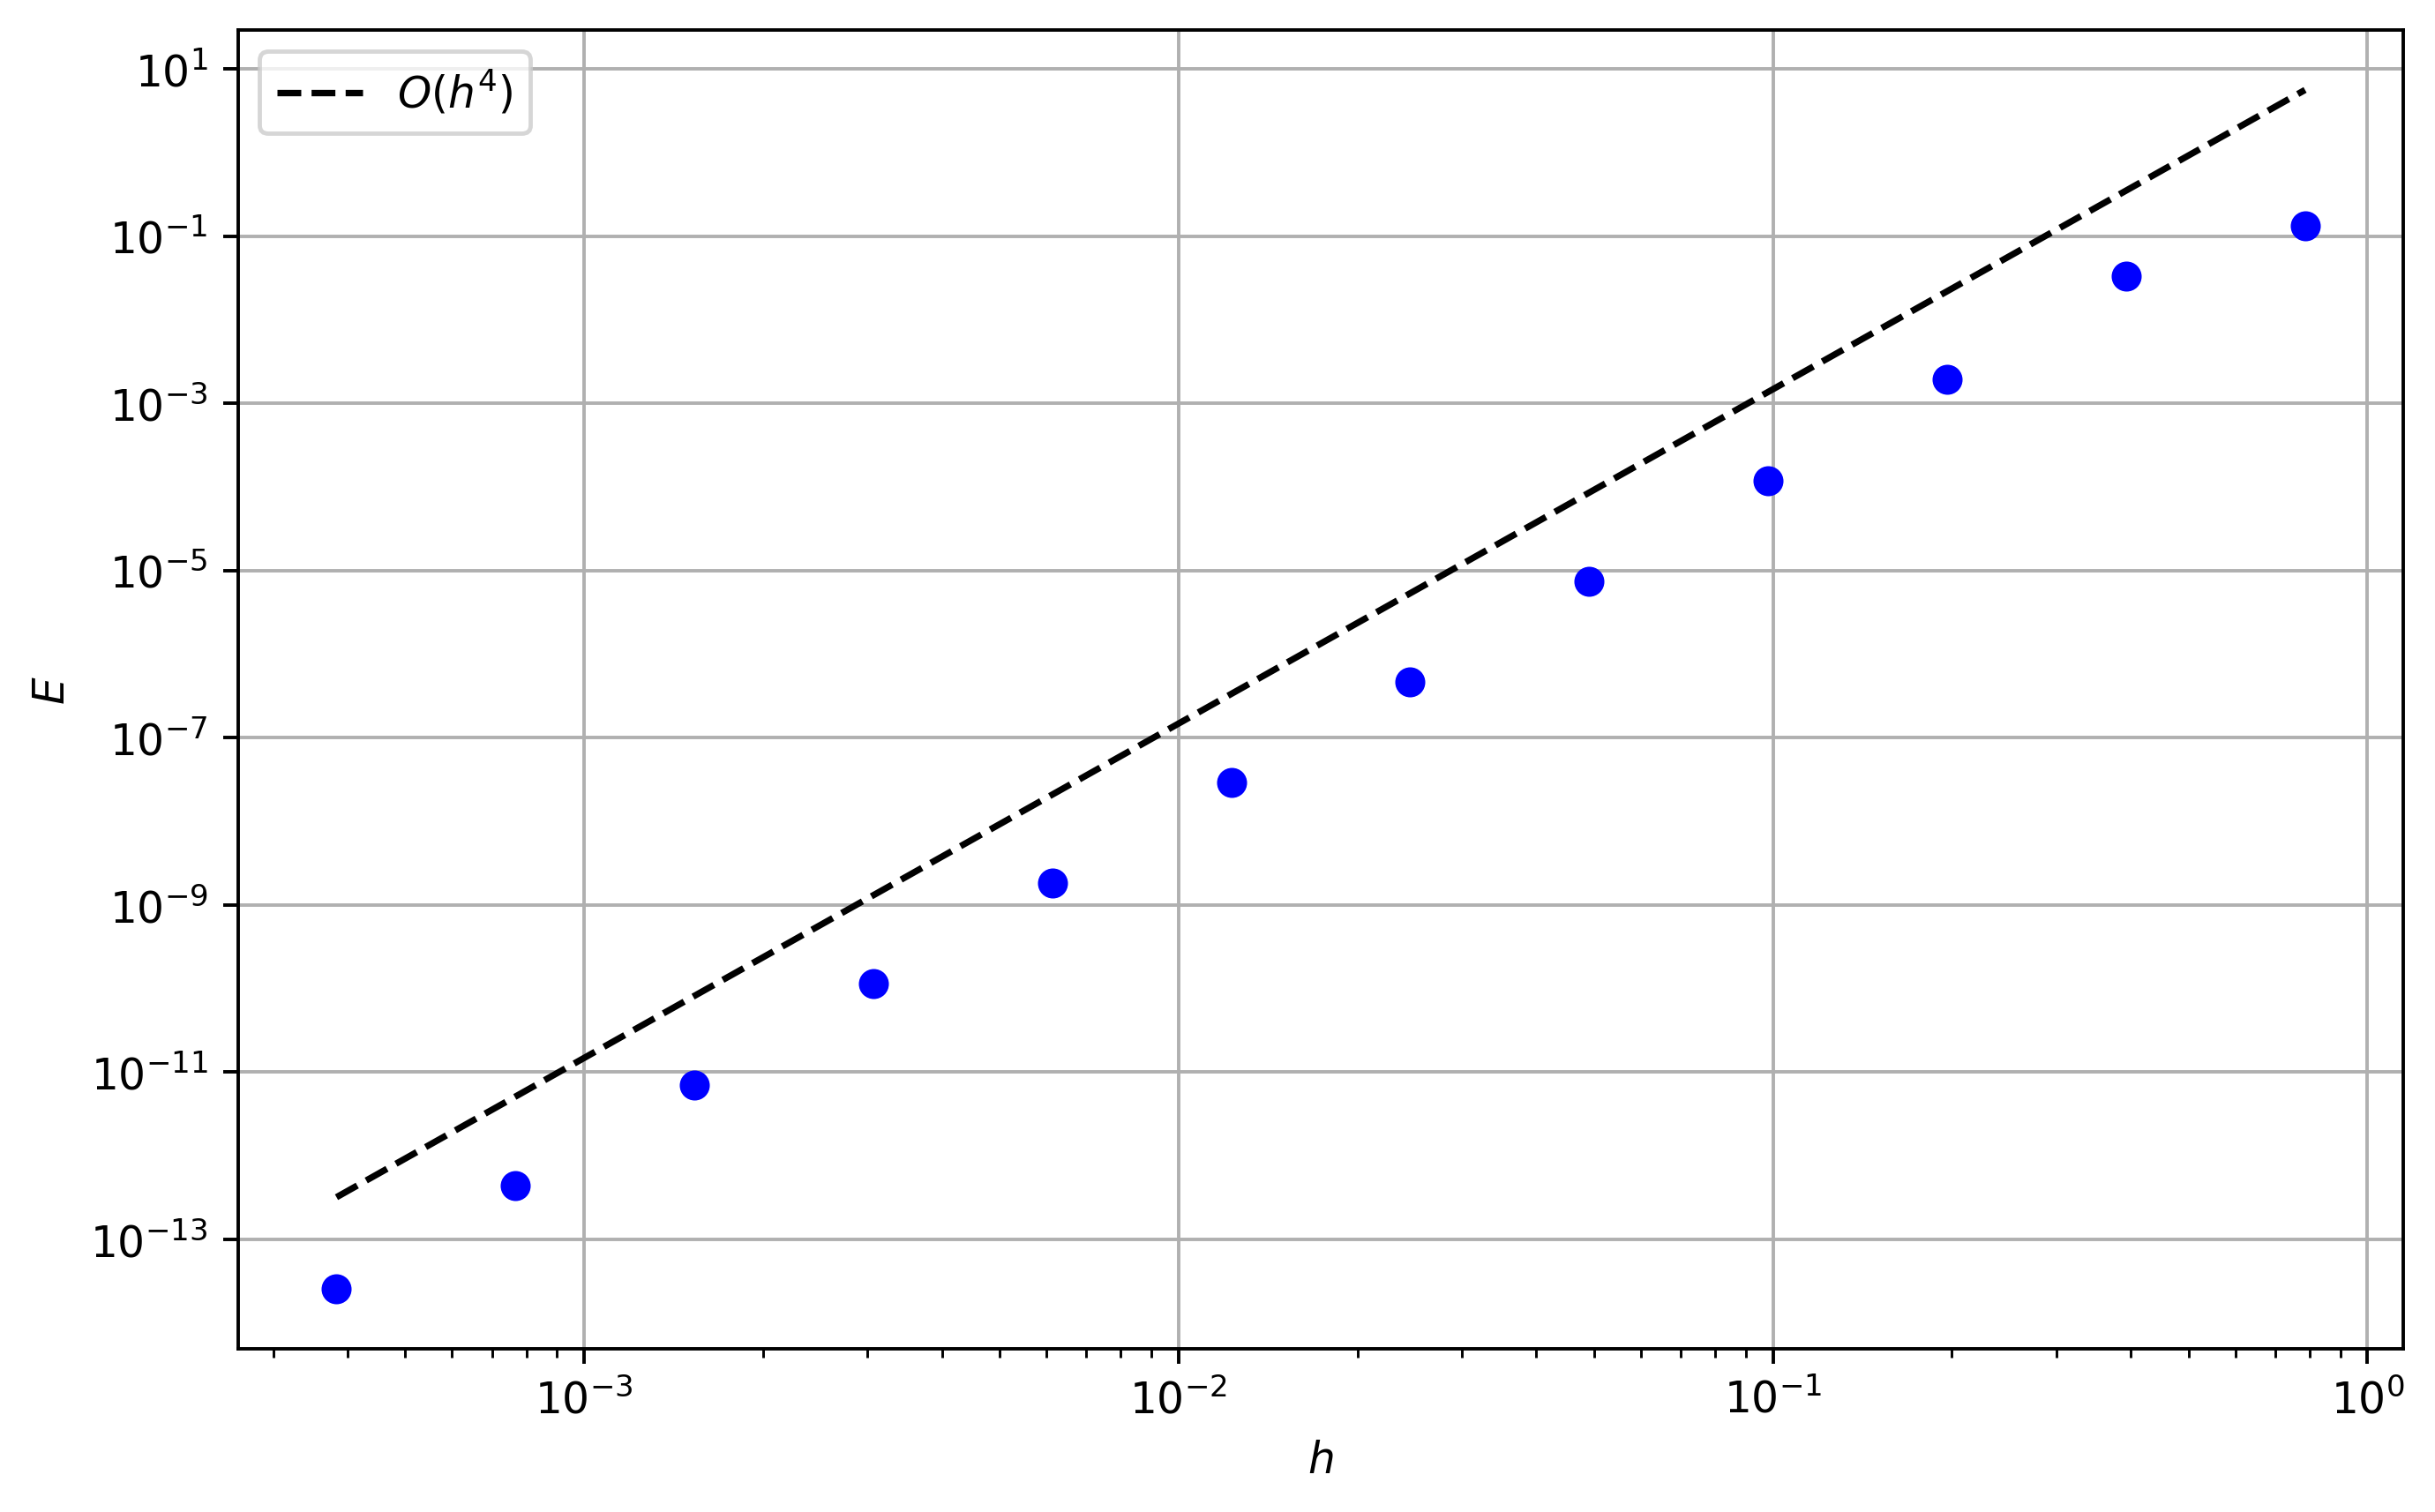

In [66]:
n = np.logspace(np.log2(low_border), np.log2(high_border), 12, True, 2, int)
h = [(b - a) / n_i for n_i in reversed(n)]
n_o = np.logspace(2, 13, 12, True, 2, int)
h_o = [(b - a) / n_i for n_i in reversed(n_o)]

E = [absolute_error_E(a, b, int(n_i), g2, definite_integral_f, composite_simpson) for n_i in reversed(n)]
O = [error_method_O_4(a, b, int(n_i), g2_fourth_prime) for n_i in reversed(n_o)]

plt.figure(figsize=(8, 5), dpi=350)
plt.loglog(h, E, 'o', color="blue")
plt.loglog(h_o, O, linestyle = "--", color="black", label="$O({h^4})$")
plt.xlabel('$h$')
plt.ylabel('$E$')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('g2_integral.png')
plt.show()

## Численное дифференцирование (продвинутая часть)

In [67]:
def P_x(x, coef):
    return np.sum(coef * x ** np.arange(len(coef)))

In [68]:
# Квадратура Гаусса 5-го порядка точности
def gaus_quad5(f, coef):
    return 8/9 * f(1, coef) + 5/9 * f(1 + np.sqrt(3/5), coef) + 5/9 * f(1 - np.sqrt(3/5), coef)

def analytic_integral(a, b, coef, d):
    return sum((coef[i]*(b**(i+1) - a**(i+1)))/(i + 1) for i in range(d))

In [69]:
random_coef = [int(rand) for rand in 10 * np.random.randn(7)]
for d in range(7):
    display(Math(f'P_{d}(x) = '+ ' + '.join(f'{random_coef[i]}x^{i}' for i in range(0, d + 1))))

analytical_results = [analytic_integral(0, 2, random_coef[:i + 1], i + 1) for i in range(7)]
gaus_results = [gaus_quad5(P_x, random_coef[:i + 1]) for i in range(7)]
absolute_errors = [np.abs(analytical_results[i] - gaus_results[i]) for i in range(7)]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [70]:
analytical_results_rounded = [round(val, 3) for val in analytical_results]
gaus_results_rounded = [round(val, 3) for val in gaus_results]
absolute_errors_rounded = [round(val, 3) for val in absolute_errors]

polynomial_names = [f'P_{i}' for i in range(7)]

dataframe_results = pd.DataFrame([
    polynomial_names,                # Row 1: Polynomial designations
    analytical_results_rounded,      # Row 2: Analytical integration results (rounded)
    gaus_results_rounded             # Row 3: Gauss quadrature results (rounded)
], index=['Полиномы', 'Результаты аналитической формулы', 'Результаты формулы квадратуры Гаусса'])

dataframe_abs = pd.DataFrame([
    polynomial_names,                # Row 1: Polynomial designations
    absolute_errors_rounded          # Row 2: Absolute errors (rounded)
], index=['Полиномы', 'Абсолютная погрешность'])

display(dataframe_results)
display(dataframe_abs)

,0,1,2,3,4,5,6
Полиномы,P_0,P_1,P_2,P_3,P_4,P_5,P_6
Результаты аналитической формулы,32.0,24.0,42.667,-25.333,-25.333,-14.667,-270.667
Результаты формулы квадратуры Гаусса,32.0,24.0,42.667,-25.333,-25.333,-14.667,-270.027


,0,1,2,3,4,5,6
Полиномы,P_0,P_1,P_2,P_3,P_4,P_5,P_6
Абсолютная погрешность,0.0,0.0,0.0,0.0,0.0,0.0,0.64
